what_were covering

1.data(prepare and load)

2.build model

3.fitting the model to data(training)

4.making predictions and evaluating a model(inferemce)

5.saving and loading a model

6.putting it all together

In [ ]:
import torch
from torch import nn #nn contains all of pytorch's building blocks for neural network
import matplotlib.pyplot as plt


1.DATA(preparing and loading)

data can be almost anything in machine learning like excel spreadsheet, images,videos,audios,DNA,Text

Machine learning is game of two parts

->get data into a numerical representation

->Build a model learn patterns in that numerical represenatation

To showcase this,let's create some **known **data using linear regression formula

In [ ]:
#slope is also known as gradient
#we will use regression  formula to make straight line with known parameters(pattern machine learns)

#create known parameters: y=a+bx where weight is b and bias is a
#intially->torch.Size([50]),after unsqueeze->torch.Size([50, 1])
weight=0.7
bias=0.3

start=0
end=1
step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X + bias
X[:10], y[:10],len(X),len(y)


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [ ]:
#splitting data into training and test data
#X is feature and y is label
train_split=int(0.8 * len(X))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [ ]:
X_train,y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [ ]:
y_test , len(y_test)

(tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]),
 10)

In [ ]:
X_test, len(X_test)

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 10)

In [ ]:
#visualizing our data
def plot_predictions(train_data=X_train,
                     train_label=y_train,
                     test_data=X_test,
                     test_label=y_test,
                     predictions=None):
  plt.figure(figsize=(6,5))
  plt.scatter(train_data,train_label,c="r",s=4,label="Training data")   #c is colour and s is size

  plt.scatter(test_data,test_label,c="g",s=4,label="Testing data")

  if predictions is not None:
    plt.scatter(test_data,predictions,c="b",s=4,label="Predictions")

  plt.legend(prop={"size":14})

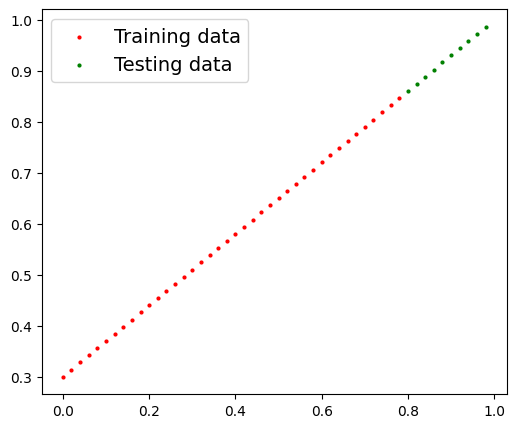

In [ ]:
plot_predictions();

Building our first pytorch model


what our model does?

1.start with random values(weight and bias)

2.look at training data and adjust the random values to better represent(or get closer to) the ideal values(the weight and bias values we used to create data . eg.0.7,0.3)


how does it do so?

1.Gradient descent

2.BackPropagation

In [ ]:
#we will be creating a linear regression model class
# torch.rand() -> Generates values from a uniform distribution in [0, 1)
# torch.randn() -> Generates values from a normal distribution with mean=0 and std=1 (can be negative or positive)
#torch..autograd module in pytorch implements gradient descent
class LinearRegressionModel(nn.Module):     # almost everything in pytorch inherits from nn.Module, it is base class for all neural network modules
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1,
                                          requires_grad=True,
                                          dtype=torch.float))

    self.bias=nn.Parameter(torch.randn(1,
                                       requires_grad=True,
                                       dtype=torch.float))

  #forward method to define the computation in the mode
  def forward(self,x:torch.Tensor) -> torch.Tensor:
    return self.weights*x + self.bias

pytorch model building essentials

1.torch.nn- contains all building blocks for computational graph(neural network)

2.torch.nn.Parameter- what parameters should our model try and learn,often a pytorch layer from torch.nn will set these for us

3.torch.nn.Moodule- base class for all neural network modules, if you subclass it,you should overwrite forward()

4.torch.optim- this where optimizers in python live, they will help with gradient descent

5.def forward()- all nn.Module subclass require you to overwrite forward(), this method define what happens in forward computation.

checking contents of our pytorch model
now we have created our model,let's see what inside...

so we can checkout our model parameters or what's inside our model using '.parameters'


In [ ]:
#create a random seed
import torch
torch.manual_seed(42)

#create an instance of the model(this is a subclass of nn.Module)
model_0=LinearRegressionModel()

#check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
#List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

**making predictions using torch.inference_mode()**

predict y_test based on X_test

when we pass data through our model, it's going through the forward() method



In [ ]:
#make predictions with model
with torch.inference_mode():     #with torch.no_grad()
  y_preds=model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

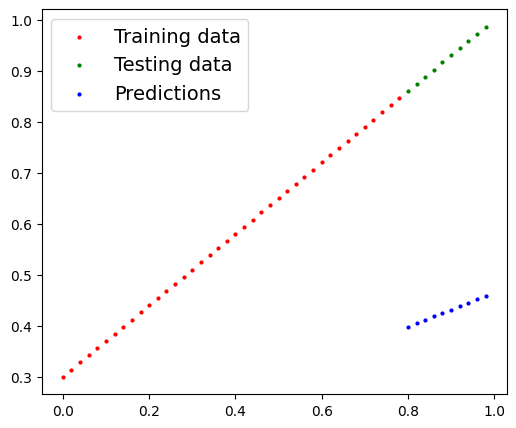

In [ ]:
plot_predictions(predictions=y_preds)

since our model is intialized with random numbers it is making random predictions. extremely far from ideal y_test

Train Model

The whole idea of training is for a model to move from some unknown parameters(these maybe random) to known parameter.

In other words, from poor represnetation of data to better represnetation of data

one way to measure how poor or how wrong model predeictions are is to use loss function
note: loss function may also called cost function or criterion

Things we need to train:
1.loss function: A function to measure how long your model prediction is to ideal prediction. lower the loss function, better!

2.optimizer: takes into account the loss of a model and adjusts the model's parameter(eg. weight and bias) to improve loss function.


specifically for pytorch we need:

1.training loop

2.testing loop


In [ ]:
#a parameter is a value that the model sets itself.Parameters help model "learn" those patterns.
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

lr=learning rate,very importnat hyperparameter that you can set.
smaller the learning rate, smaller the change in parameter

params- the model parameters you would optimize

In [ ]:
#in pytorch L1Loss->MAE and L2Loss->MSE  (usually used in regression problem)
#Setup a loss function
loss_fn=nn.L1Loss()
loss_fn

#setup an optimizer (stochastic gradient descent)
optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.01)

Building a training and testing loop

things we need to do in training loops:

 ->>loop through the data and do....

step1:forward passthis involves data moving through our model's forward() function(data moving from input to output layer) to make prediction on data, also called forward propagation

step2:calculate the loss(compare forward pass prediction to ground truth labels)

step3:optimize zero grad

step4:loss backward- move backward through the network to calculate the gradients of each of the parameters of our model with respect to the loss.(backpropagation)

step5:optimizer-use optimizer to adjust parameters to improve loss(gradient descent)

gradient is slope. i.e change in y/change in x



In [ ]:
#An epoch is one loop through the data (this is hyperparameter since we set it ourselves)
epochs=200

#track different values
epoch_count=[]
loss_values=[]
test_loss_values=[]

for epoch in range(epochs):
  #set the model to training mode(default mode)
  model_0.train()    #train mode in pytorch set all parameter that require gradients to require gradients

  #foward pass
  y_pred=model_0(X_train)   #this will perform forward method located within the model object.Behind the scenes, it calls model_0.forward(X_train).

  #claculate the loss
  loss=loss_fn(y_pred,y_train)


  #optimizer zero grad
  optimizer.zero_grad()

  #perform back propagation on the loss with respect to the parameters of the model
  loss.backward()

  #optimixer(perfoem gradient descent)
  optimizer.step()     #the changes wil accumulate through the loop ..so we have to zero them for the next iteration of the loop

  #Testing loop
  model_0.eval()   #turns off different settings in model not needed for evaluaion/testing(dropout/batchnorm layer)
  with torch.inference_mode():
      #do the forward pass in testing mode
      test_pred=model_0(X_test)

      #calculate loss
      test_loss=loss_fn(test_pred,y_test)
  if epoch%10==0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
print(f"Epoch: {epoch_count} | Loss: {loss_values} | Test loss: {test_loss_values}")



Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
Epoch: 70 | Loss: 0.03476089984178543 | Test loss: 0.0805937647819519
Epoch: 80 | Loss: 0.03132382780313492 | Test loss: 0.07232122868299484
Epoch: 90 | Loss: 0.02788739837706089 | Test loss: 0.06473556160926819
Epoch: 100 | Loss: 0.024458957836031914 | Test loss: 0.05646304413676262
Epoch: 110 | Loss: 0.021020207554101944 | Test loss: 0.04819049686193466
Epoch: 120 | Loss: 0.01758546568453312 | Test loss: 0.04060482233762741
Epoch: 130 | Loss: 0.014155393466353416 | Test loss: 0.03233227878808975
Ep

In [ ]:
#making prediction again to check
with torch.inference_mode():
    y_preds_new = model_0(X_test)

y_preds_new


tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

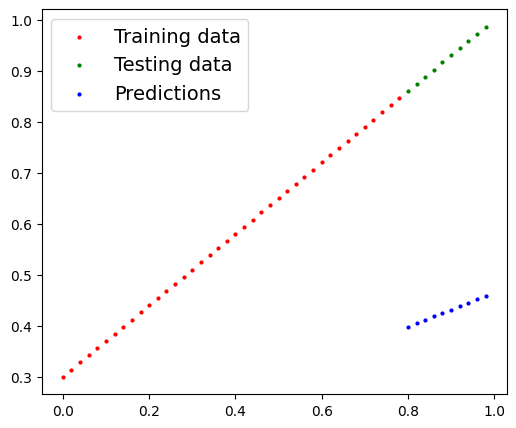

In [ ]:
#our first visualization when we did not train aur model. just built and predicted
plot_predictions(predictions=y_preds)

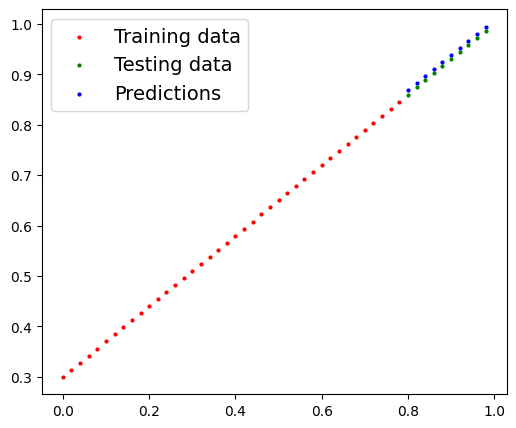

In [ ]:
#after training the model. the predictions are very better
plot_predictions(predictions=y_preds_new)

**Saving a model in pytorch**

There are three main methods we should know about for saving and loading models in pytorch:

1.torch.save()- allows to save pytorch object in python's pickle format

2.torch.load()-allows you to load a saved pytorch object

3.torch.nn.module.load_state_dict()-allows to load a model's saved state dictionary

In [ ]:
#the optimizer too has its state_dict i.e optimizer.state_dict()
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
#saving our pytorch model
from pathlib import Path

#create a model directory
MODEL_PATH= Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

#create model save path
MODEL_NAME="01_pytorch_workflow-model_0.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

MODEL_SAVE_PATH

#save the model state dict
print(f"saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)

saving model to: models/01_pytorch_workflow-model_0.pth


In [ ]:
!ls -1 models

01_pytorch_workflow-model_0.pth
01_pytorch_workflow-model_1.pth


**Loading our model back to colab**

since we saved our model state_dict() rather than entire model. we will create a new instance of ur model class and load the saved state_dict() into that

In [ ]:
#to load in a saved_dict, instantiate a new instance of our model class

loaded_model_0=LinearRegressionModel()

#load the savedstate dict of model_0(this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
#make some prediction with our loaded model
loaded_model_0.eval()   #in eval mode , predictions are faster
with torch.inference_mode():
  Loaded_model_preds=loaded_model_0(X_test)
  print(Loaded_model_preds)

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])


In [ ]:
#compare loaded model preds with original model preds
y_preds_new==Loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

y_preds=untrained model prediction

y_preds_new=trained model prediction

Loded_model_preds=loaded previous model prediction with same parameters values(state dict) but new instance

->PUTTING ALL TOGETHER

In [ ]:
import torch
import matplotlib as plt
from torch import nn

create device agnostic code

this means if we get access to gpu our code will use it for faster computing.

if no gpu is available , the code will default to using cpu

In [ ]:
device="cuda" if torch.cuda.is_available() else "cpu"
print(f"using device:{device}")

using device:cpu


In [ ]:
#creating dummy dataset y=weight* x + bias
weight=0.7
bias-0.3
start=0
end=1
step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)  #without unsqueeze,error will pop
y=weight * X+ bias
print(X,len(X))
print(y,len(y))

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]]) 50
tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
      

In [ ]:
#create the train and test split
train_split=int(0.8*len(X))
X_train=X[:train_split]
y_train=y[:train_split]
X_test=X[train_split:]
y_test=y[train_split:]
print(len(X_train),len(y_train),len(X_test),len(y_test))

40 40 10 10


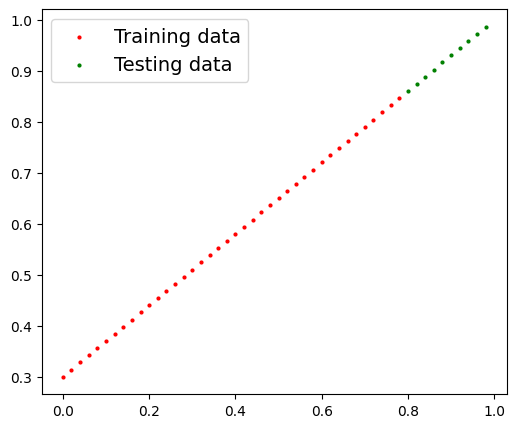

In [ ]:
#plot the data
import matplotlib.pyplot as plt
plot_predictions(X_train,y_train,X_test,y_test)

In [ ]:
#building pytorch linear model by subclassing nn.Module
#linear layer/linear transformation/probing layer/fully connected layer/dense layer
class LinearRegressionModelv2(nn.Module):
  def __init__(self):
    super().__init__()
    #use nn.Linear() for creating the model parameters
    #nn.linear implemernting linear regression formula(forward method) also creating parameters for us
    #in this linear layer, 1 feature and 1 label hence in and out feature size is 1
    self.linear_layer=nn.Linear(in_features=1,out_features=1)

  def forward(self,x: torch.Tensor) ->torch.Tensor:
      return self.linear_layer(x)    #passing x through the linear layers which expxepts 1 inout and 1 output


torch.manual_seed(42)
model_1=LinearRegressionModelv2()
model_1,model_1.state_dict()



(LinearRegressionModelv2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
#first checking the current device the model is running on
next(model_1.parameters()).device
#set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

 We are evaluating the model on the test data after every epoch.

 This is not to get the final test accuracy, but to monitor the model's performance during training.

 By checking test loss after each epoch, we can:

 1.Track whether the model is improving or not.

 2.Detect overfitting early — if training loss decreases but test loss increases.

 3.Use early stopping techniques to stop training when test loss stops improving.

 Though final testing is done after full training, evaluating during training is a useful practice.


In [ ]:
#training code
#set up loss function and optimizer
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.01)
#training and testing loop
torch.manual_seed(42)
epochs=10
#put data on target device
X_train=X_train.to(device)
y_train=y_train.to(device)
X_test=X_test.to(device)
y_test=y_test.to(device)
for epoch in range(epochs):
  model_1.train()
  y_pred=model_1(X_train)
  Loss=loss_fn(y_pred,y_train)
  optimizer.zero_grad()
  Loss.backward()
  optimizer.step()
  model_1.eval()
  with torch.inference_mode():
    test_pred=model_1(X_test)
    test_loss=loss_fn(test_pred,y_test)
  if epoch%10==0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")


Epoch: 0 | Loss: 0.0025885067880153656 | Test loss: 0.5739762187004089


In [ ]:
print(list(model_1.parameters()))


[Parameter containing:
tensor([[0.7255]], requires_grad=True), Parameter containing:
tensor([0.7300], requires_grad=True)]


In [ ]:
model_1.eval()
with torch.inference_mode():
  y_preds=model_1(X_test)
y_preds

tensor([[1.3104],
        [1.3249],
        [1.3395],
        [1.3540],
        [1.3685],
        [1.3830],
        [1.3975],
        [1.4120],
        [1.4265],
        [1.4410]])

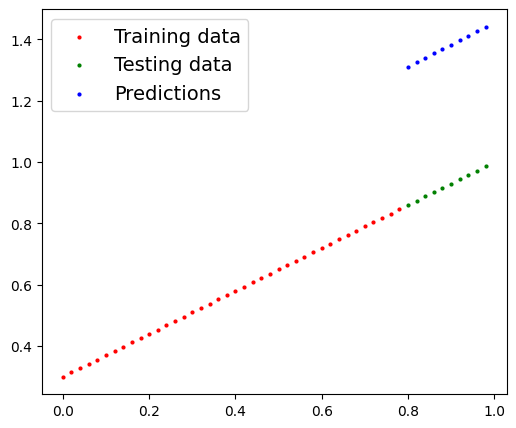

In [ ]:
plot_predictions(predictions=y_preds.cpu())

In [ ]:
from pathlib import Path
#MODEL_PATH=Path("models")
#MODEL_PATH.mkdir(parents=True,exist_ok=True)
MODEL_NAME="01_pytorch_workflow-model_1.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME
torch.save(obj=model_1.state_dict(),f=MODEL_SAVE_PATH)

In [ ]:
loaded_model_1=LinearRegressionModelv2()
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
#put target loaded model to device
loaded_model_1.to(device)

LinearRegressionModelv2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [ ]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7255]])),
             ('linear_layer.bias', tensor([0.7300]))])

In [ ]:
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds=loaded_model_1(X_test)
loaded_model_1_preds

tensor([[1.3104],
        [1.3249],
        [1.3395],
        [1.3540],
        [1.3685],
        [1.3830],
        [1.3975],
        [1.4120],
        [1.4265],
        [1.4410]])

In [ ]:
y_preds==loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

**Exercise**
( For all exercises, your code should be device agnostic meaning it could run on CPU or GPU if it's available).

Create a straight line dataset using the linear regression formula (weight * X + bias).

Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.

Split the data into 80% training, 20% testing.

Plot the training and testing data so it becomes visual.

cuda
80 80 20 20


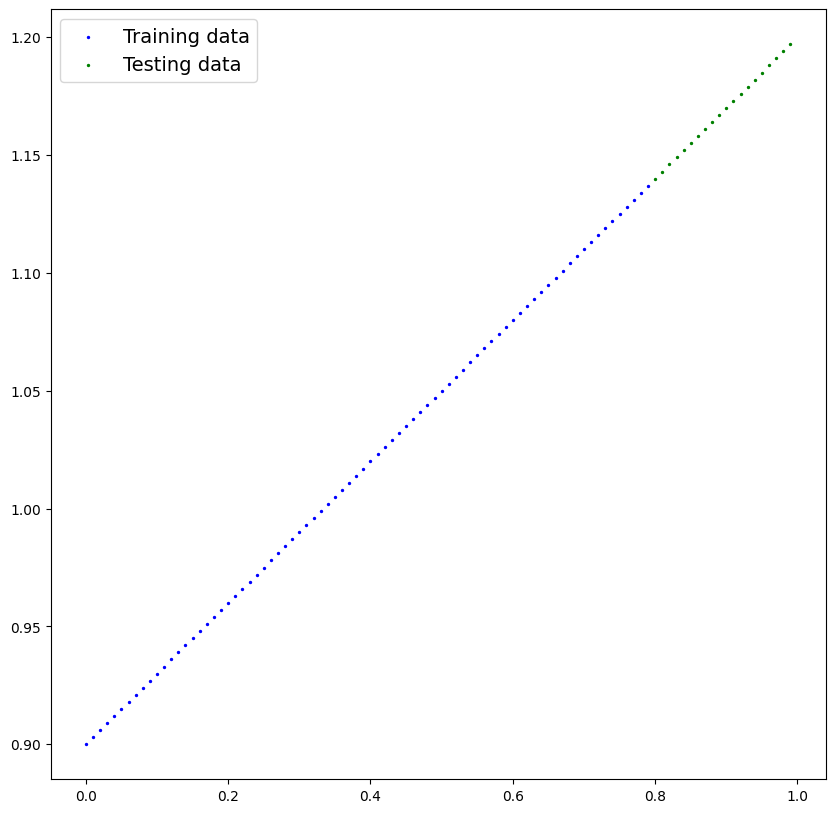

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

device="cuda" if torch.cuda.is_available() else "cpu"
print(device)

weight=0.3
bias=0.9
start=0
end=1
step=0.01
X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight* X + bias


split=int(0.8*len(X))
X_train=X[:split]
y_train=y[:split]
X_test=X[split:]
y_test=y[split:]
print(len(X_train),len(y_train),len(X_test),len(y_test))


def plot_predictions(train_data=X_train,train_Label=y_train,test_data=X_test,test_Label=y_test,predictions=None):
    plt.figure(figsize=(10,10))
    plt.scatter(train_data,train_Label,c="b",s=2,label="Training data")
    plt.scatter(test_data,test_Label,c="g",s=2,label="Testing data")
    if predictions is not None:
      plt.scatter(test_data,predictions,c="r",s=2,label="predicted data")
    plt.legend(prop={"size":14})



plot_predictions()


Build a PyTorch model by subclassing nn.Module.

Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.
Implement the forward() method to compute the linear regression function you used to create the dataset in 1.

Once you've constructed the model, make an instance of it and check its state_dict().

Note: If you'd like to use nn.Linear() instead of nn.Parameter() you can.

In [ ]:
class LinearRegressionModelv3(nn.Module):
    def __init__(self):
        super().__init__()
        self.Linear_layer=nn.Linear(in_features=1,out_features=1)
    def forward(self,x:torch.tensor)->torch.tensor:
        return self.Linear_layer(x)

torch.manual_seed(42)
model_2=LinearRegressionModelv3()
model_2.state_dict()

model_2.to(device)
next(model_2.parameters()).device

device(type='cuda', index=0)

Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.

Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.

Write a training loop to perform the appropriate training steps for 300 epochs.

The training loop should test the model on the test dataset every 20 epochs

In [ ]:
X_train=X_train.to(device)
y_train=y_train.to(device)
X_test=X_test.to(device)
y_test=y_test.to(device)
loss_fn_new=nn.L1Loss()
optimizer_new=torch.optim.Adam(params=model_2.parameters(),lr=0.01)
epochs=300
for epoch in range(epochs):
    model_2.train()
    y_pred_new=model_2(X_train)
    loss=loss_fn_new(y_pred_new,y_train)
    optimizer_new.zero_grad()
    loss.backward()
    optimizer_new.step()

    if epoch%20==0:
        model_2.eval()
        with torch.inference_mode():
            test_pred=model_2(X_test)
            test_loss=loss_fn_new(test_pred,y_test)
            print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")


Epoch: 0 | Loss: 0.1275613158941269 | Test loss: 0.32681992650032043
Epoch: 20 | Loss: 0.06593604385852814 | Test loss: 0.10931289196014404
Epoch: 40 | Loss: 0.032058585435152054 | Test loss: 0.06875057518482208
Epoch: 60 | Loss: 0.0019438796443864703 | Test loss: 0.009274548850953579
Epoch: 80 | Loss: 0.0023476870264858007 | Test loss: 0.005570918321609497
Epoch: 100 | Loss: 0.0015308514703065157 | Test loss: 0.0004207432211842388
Epoch: 120 | Loss: 0.004162569530308247 | Test loss: 0.007628637831658125
Epoch: 140 | Loss: 0.003665973199531436 | Test loss: 0.006718778517097235
Epoch: 160 | Loss: 0.0026628882624208927 | Test loss: 0.004277241416275501
Epoch: 180 | Loss: 0.00026640520081855357 | Test loss: 0.0026450396981090307
Epoch: 200 | Loss: 0.0012217946350574493 | Test loss: 0.002988111926242709
Epoch: 220 | Loss: 0.000634444528259337 | Test loss: 0.002345263957977295
Epoch: 240 | Loss: 0.00221223384141922 | Test loss: 0.001145052956417203
Epoch: 260 | Loss: 0.0019213780760765076 |

Make predictions with the trained model on the test data.

Visualize these predictions against the original training and testing data (note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot)

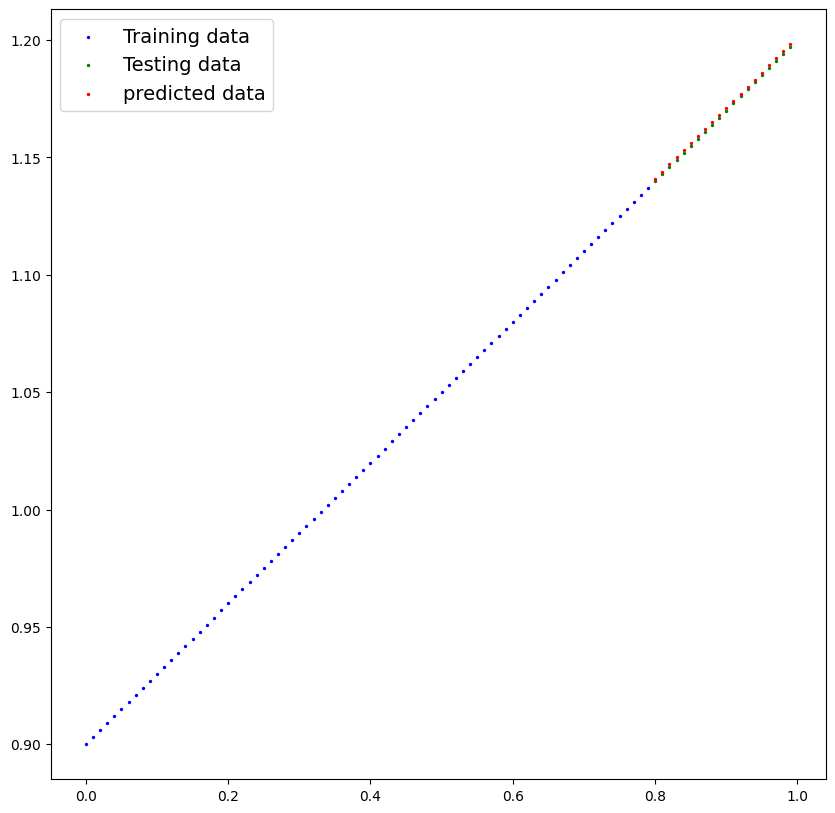

In [ ]:
model_2.eval()
with torch.inference_mode():
  y_pred_final=model_2(X_test)
plot_predictions(predictions=y_pred_final.cpu())

Save your trained model's state_dict() to file.

Create a new instance of your model class you made in 2. and load in the state_dict() you just saved to it.

Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [ ]:
from pathlib import Path
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)
MODEL_NAME="01_pytorch_workflow-model_2.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME
torch.save(obj=model_2.state_dict(),f=MODEL_SAVE_PATH)

In [ ]:
loaded_model_2=LinearRegressionModelv3()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_2.to(device)

LinearRegressionModelv3(
  (Linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
loaded_model_2.eval()
with torch.inference_mode():
  Loaded_2_preds=loaded_model_2(X_test)

print(y_pred_final==Loaded_2_preds)

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')
